## Выбор и обучение модели

# В данном задании найдем габариты целевого объекта используя эталон с заранее известными размерами 

### YOLO 8

In [ ]:
!pip install -q ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.4/756.4 kB 8.4 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
import numpy as np
import random
from matplotlib import pyplot as plt
%matplotlib inline
import time
import sys
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor
from PIL import Image
import cv2
import supervision as sv
!{sys.executable} -m pip install 'git+https://github.com/facebookresearch/segment-anything.git'
!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
sys.path.append("..")






  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-3bqczo1n
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-3bqczo1n
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done
  Created wheel for segment-anything: filename=segment_anything-1.0-py3-none-any.whl size=36590 sha256=d94350882cadd1d855a396f13bcc57b9d4a25117a4ecca1a05988b02febf29c7
  Stored in directory: /tmp/pip-ephem-wheel-cache-lk2pht6v/wheels/10/cf/59/9ccb2f0a1bcc81d4fbd0e501680b5d088d690c6cfbc02dc99d
Successfully built segment-anything
--2024-05-12 10:25:35--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 108.157.254.15, 108.157.254.121, 108.157.254.102, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|1

In [ ]:
#загружаем предобученную модель SAM
sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

Sam(
  (image_encoder): ImageEncoderViT(
    (patch_embed): PatchEmbed(
      (proj): Conv2d(3, 1280, kernel_size=(16, 16), stride=(16, 16))
    )
    (blocks): ModuleList(
      (0-31): 32 x Block(
        (norm1): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (attn): Attention(
          (qkv): Linear(in_features=1280, out_features=3840, bias=True)
          (proj): Linear(in_features=1280, out_features=1280, bias=True)
        )
        (norm2): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (lin1): Linear(in_features=1280, out_features=5120, bias=True)
          (lin2): Linear(in_features=5120, out_features=1280, bias=True)
          (act): GELU(approximate='none')
        )
      )
    )
    (neck): Sequential(
      (0): Conv2d(1280, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): LayerNorm2d()
      (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (3): LayerNorm2d

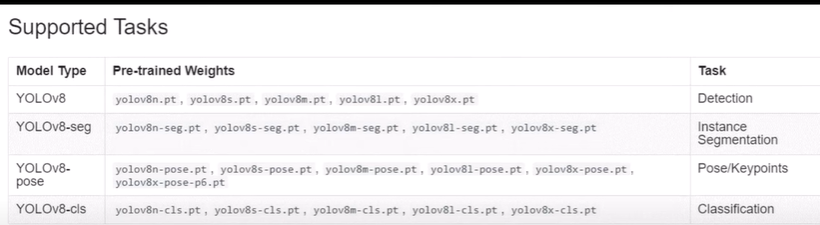

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#  используем модель 8x
det_model = YOLO('yolov8x.pt')

100%|██████████| 131M/131M [00:00<00:00, 321MB/s] 


In [ ]:
#загрузим веса детектора целевых объектов
model_object = YOLO('/content/drive/MyDrive/comet/best.pt')

In [ ]:
# обучим модель на изображениях эталона
det_result = det_model.train(
    project = '/content/drive/MyDrive/comet/comet.v1i.yolov8.zip (Unzipped Files)/',
    data = '/content/drive/MyDrive/comet/comet.v1i.yolov8.zip (Unzipped Files)/data.yaml',
    name = 'yolov8x_comet',
    epochs = 40,
    patience = 0,
    batch=32,
    imgsz = 480
)

Ultralytics YOLOv8.2.13 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/content/drive/MyDrive/comet/comet.v1i.yolov8.zip (Unzipped Files)/data.yaml, epochs=40, time=None, patience=0, batch=32, imgsz=480, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/comet/comet.v1i.yolov8.zip (Unzipped Files)/, name=yolov8x_comet, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, s

100%|██████████| 755k/755k [00:00<00:00, 128MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.conv.Conv             [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.conv.Conv             [320, 640, 3, 2]              
  6                  -1  6  13117440  ultralytics.nn.modules.block.C2f             [640, 640, 6, True]           
  7                  -1  1   3687680  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 280MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/comet/comet.v1i.yolov8.zip (Unzipped Files)/train/labels... 23 images, 0 backgrounds, 0 corrupt: 100%|██████████| 23/23 [00:43<00:00,  1.90s/it]

train: New cache created: /content/drive/MyDrive/comet/comet.v1i.yolov8.zip (Unzipped Files)/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/comet/comet.v1i.yolov8.zip (Unzipped Files)/valid/labels... 6 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6/6 [00:11<00:00,  2.00s/it]

val: New cache created: /content/drive/MyDrive/comet/comet.v1i.yolov8.zip (Unzipped Files)/valid/labels.cache


Plotting labels to /content/drive/MyDrive/comet/comet.v1i.yolov8.zip (Unzipped Files)/yolov8x_comet/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 480 train, 480 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/comet/comet.v1i.yolov8.zip (Unzipped Files)/yolov8x_comet
Starting training for 40 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/40      11.8G     0.3638      2.664     0.9056         45        480: 100%|██████████| 1/1 [00:02<00:00,  2.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.08s/it]

                   all          6          6      0.941        0.5      0.621      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/40      10.9G     0.4871      2.807     0.9117         40        480: 100%|██████████| 1/1 [00:00<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.57it/s]

                   all          6          6      0.919        0.5      0.622      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/40      10.9G     0.4511      2.877     0.9318         40        480: 100%|██████████| 1/1 [00:00<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

                   all          6          6      0.899        0.5       0.62      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/40      10.9G     0.4347      2.513     0.8919         41        480: 100%|██████████| 1/1 [00:00<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.33it/s]

                   all          6          6       0.84        0.5       0.62      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/40      10.9G     0.4136      2.691     0.9106         42        480: 100%|██████████| 1/1 [00:00<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.05it/s]


                   all          6          6      0.865        0.5      0.619      0.591

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/40      10.9G     0.4214      2.701      0.916         40        480: 100%|██████████| 1/1 [00:01<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.59it/s]

                   all          6          6      0.971        0.5      0.619      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/40        11G     0.4636      2.635     0.9164         39        480: 100%|██████████| 1/1 [00:01<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.24it/s]

                   all          6          6       0.75          1       0.83      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/40      11.5G     0.3397      7.853     0.9173         31        480: 100%|██████████| 1/1 [00:00<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.09it/s]

                   all          6          6       0.75          1      0.843      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/40      11.5G     0.4626      7.847     0.9515         34        480: 100%|██████████| 1/1 [00:01<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.18it/s]


                   all          6          6       0.75          1      0.901      0.863

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/40      11.5G      0.472      6.664     0.9221         40        480: 100%|██████████| 1/1 [00:00<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.92it/s]

                   all          6          6       0.75          1      0.876      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/40      11.5G     0.3573      5.976     0.8803         45        480: 100%|██████████| 1/1 [00:00<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.10it/s]

                   all          6          6       0.78        0.6      0.712      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/40      11.5G     0.5019      2.966     0.8992         36        480: 100%|██████████| 1/1 [00:00<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.87it/s]

                   all          6          6      0.667          1      0.718      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/40      11.5G     0.4334      1.601     0.8744         31        480: 100%|██████████| 1/1 [00:01<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.58it/s]

                   all          6          6     0.0682        0.5      0.123      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/40      11.5G     0.5645      1.601     0.9936         39        480: 100%|██████████| 1/1 [00:00<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.25it/s]


                   all          6          6       0.25          1      0.249      0.212

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/40      11.5G      0.645      1.047     0.9699         41        480: 100%|██████████| 1/1 [00:01<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.30it/s]


                   all          6          6       0.75          1      0.924      0.678

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/40      11.5G     0.6192      1.364     0.9769         29        480: 100%|██████████| 1/1 [00:01<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.55it/s]

                   all          6          6        0.4          1      0.415      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/40      11.5G      0.537     0.9638     0.9418         38        480: 100%|██████████| 1/1 [00:00<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.22it/s]

                   all          6          6      0.857          1      0.972       0.94



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/40      11.5G     0.6342      1.175     0.9245         46        480: 100%|██████████| 1/1 [00:00<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.46it/s]

                   all          6          6          1          1      0.995       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/40      11.5G     0.4695      1.187     0.8783         33        480: 100%|██████████| 1/1 [00:00<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.18it/s]

                   all          6          6          1          1      0.995      0.898



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/40      11.5G     0.4742     0.8025     0.8896         36        480: 100%|██████████| 1/1 [00:01<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.27it/s]

                   all          6          6          1          1      0.995      0.907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/40      11.5G     0.4621     0.7682     0.8905         48        480: 100%|██████████| 1/1 [00:01<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.43it/s]

                   all          6          6        0.6          1      0.718      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/40      11.5G     0.5053      1.053      0.941         33        480: 100%|██████████| 1/1 [00:01<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.90it/s]

                   all          6          6        0.6          1      0.718      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/40      11.5G     0.4881     0.7087     0.8742         33        480: 100%|██████████| 1/1 [00:01<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.15it/s]

                   all          6          6      0.857          1      0.995       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/40      11.5G     0.4547     0.8456     0.8577         41        480: 100%|██████████| 1/1 [00:01<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.96it/s]

                   all          6          6          1          1      0.995       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/40      11.5G     0.4992     0.6843       0.92         40        480: 100%|██████████| 1/1 [00:01<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.88it/s]

                   all          6          6       0.75          1      0.955      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/40      11.5G     0.4604     0.5641     0.8819         46        480: 100%|██████████| 1/1 [00:01<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.25it/s]

                   all          6          6      0.385      0.833      0.786      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/40      11.5G     0.4861     0.5841     0.8861         42        480: 100%|██████████| 1/1 [00:01<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.79it/s]

                   all          6          6     0.0229      0.833      0.023     0.0188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/40      11.5G      0.469     0.5864     0.9184         41        480: 100%|██████████| 1/1 [00:01<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.62it/s]

                   all          6          6    0.00955      0.833     0.0113    0.00926



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/40      11.5G     0.4367      0.732     0.8828         31        480: 100%|██████████| 1/1 [00:01<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.91it/s]

                   all          6          6    0.00694      0.333    0.00769    0.00585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/40      11.5G     0.4679     0.7064     0.8831         55        480: 100%|██████████| 1/1 [00:01<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.02it/s]

                   all          6          6      0.014      0.667     0.0167     0.0143


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/40      11.5G     0.3587     0.5565        0.8         23        480: 100%|██████████| 1/1 [00:02<00:00,  2.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.13it/s]

                   all          6          6    0.00396      0.833    0.00556     0.0047



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/40      11.5G     0.3722     0.5849     0.9103         23        480: 100%|██████████| 1/1 [00:01<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.34it/s]

                   all          6          6    0.00726      0.667    0.00856    0.00745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/40      11.5G     0.3535      0.546     0.8834         23        480: 100%|██████████| 1/1 [00:01<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.76it/s]

                   all          6          6     0.0158      0.667     0.0276     0.0247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/40      11.5G     0.3725     0.5781      0.855         23        480: 100%|██████████| 1/1 [00:01<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.97it/s]

                   all          6          6      0.015      0.667     0.0811     0.0738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/40      11.5G     0.3552     0.5409     0.8559         23        480: 100%|██████████| 1/1 [00:01<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.03it/s]

                   all          6          6     0.0226      0.667     0.0521     0.0466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/40      11.5G     0.3371      0.551     0.8996         23        480: 100%|██████████| 1/1 [00:01<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.85it/s]

                   all          6          6     0.0385      0.667     0.0747     0.0684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/40      11.5G     0.2983      0.504     0.8097         23        480: 100%|██████████| 1/1 [00:01<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.43it/s]

                   all          6          6       0.75        0.5      0.495      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/40      11.5G     0.2772     0.4662     0.8006         23        480: 100%|██████████| 1/1 [00:01<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.10it/s]

                   all          6          6          1        0.5      0.495      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/40      11.5G     0.2869     0.4424     0.7987         23        480: 100%|██████████| 1/1 [00:01<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.68it/s]

                   all          6          6       0.98      0.667      0.665       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/40      11.5G     0.2781     0.4182     0.7991         23        480: 100%|██████████| 1/1 [00:01<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.56it/s]

                   all          6          6      0.977      0.667      0.667      0.627



40 epochs completed in 0.057 hours.
Optimizer stripped from /content/drive/MyDrive/comet/comet.v1i.yolov8.zip (Unzipped Files)/yolov8x_comet/weights/last.pt, 136.7MB
Optimizer stripped from /content/drive/MyDrive/comet/comet.v1i.yolov8.zip (Unzipped Files)/yolov8x_comet/weights/best.pt, 136.7MB

Validating /content/drive/MyDrive/comet/comet.v1i.yolov8.zip (Unzipped Files)/yolov8x_comet/weights/best.pt...
Ultralytics YOLOv8.2.13 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68124531 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.52it/s]


                   all          6          6       0.75          1      0.876      0.848
Speed: 0.2ms preprocess, 24.0ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to /content/drive/MyDrive/comet/comet.v1i.yolov8.zip (Unzipped Files)/yolov8x_comet


In [ ]:
orig_res = det_model.val(
    data = "/content/drive/MyDrive/comet/comet.v1i.yolov8.zip (Unzipped Files)/data.yaml"
)

Ultralytics YOLOv8.2.13 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68124531 parameters, 0 gradients, 257.4 GFLOPs


val: Scanning /content/drive/MyDrive/comet/comet.v1i.yolov8.zip (Unzipped Files)/test/labels... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:18<00:00,  1.90s/it]

val: New cache created: /content/drive/MyDrive/comet/comet.v1i.yolov8.zip (Unzipped Files)/test/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 4, len(boxes) = 10. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.14it/s]


                   all         10         10      0.313        0.6      0.517      0.399
Speed: 0.2ms preprocess, 56.4ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to /content/drive/MyDrive/comet/comet.v1i.yolov8.zip (Unzipped Files)/yolov8x_comet2



image 1/1 /content/drive/MyDrive/comet/comet.v1i.yolov8.zip (Unzipped Files)/test/images/photo_13_2024-05-12_13-06-07_jpg.rf.e91cf9d5954848fd1a1e5c26d14dae19.jpg: 480x480 8 comets, 57.5ms
Speed: 3.6ms preprocess, 57.5ms inference, 2.6ms postprocess per image at shape (1, 3, 480, 480)


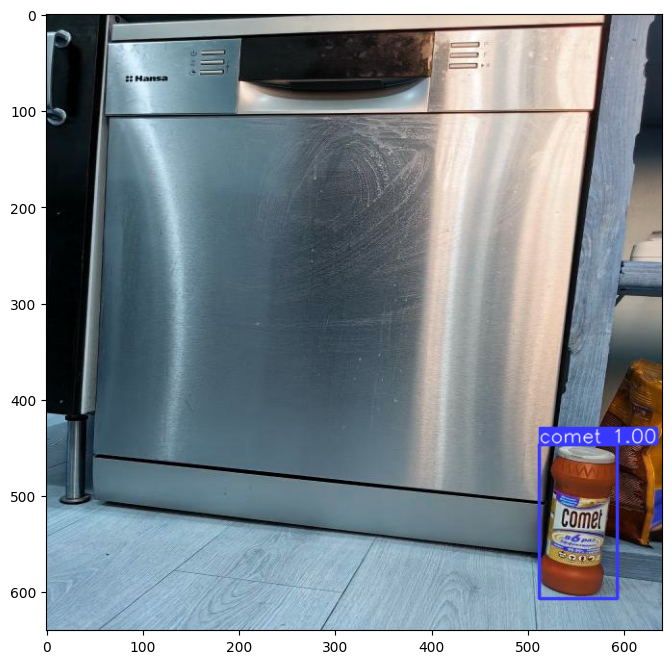

In [ ]:
image_path = '/content/drive/MyDrive/comet/comet.v1i.yolov8.zip (Unzipped Files)/test/images/photo_13_2024-05-12_13-06-07_jpg.rf.e91cf9d5954848fd1a1e5c26d14dae19.jpg'
result  = det_model(image_path)
for result in result:
    boxes = result.boxes

bbox = boxes.xyxy.tolist()[0]
result[0].plot()

plt.figure(figsize=(8,8))
plt.imshow(result[0].plot())

SupervisionWarnings: red is deprecated: `Color.red()` is deprecated and will be removed in `supervision-0.22.0`. Use `Color.RED` instead.
SupervisionWarnings: red is deprecated: `Color.red()` is deprecated and will be removed in `supervision-0.22.0`. Use `Color.RED` instead.
SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead


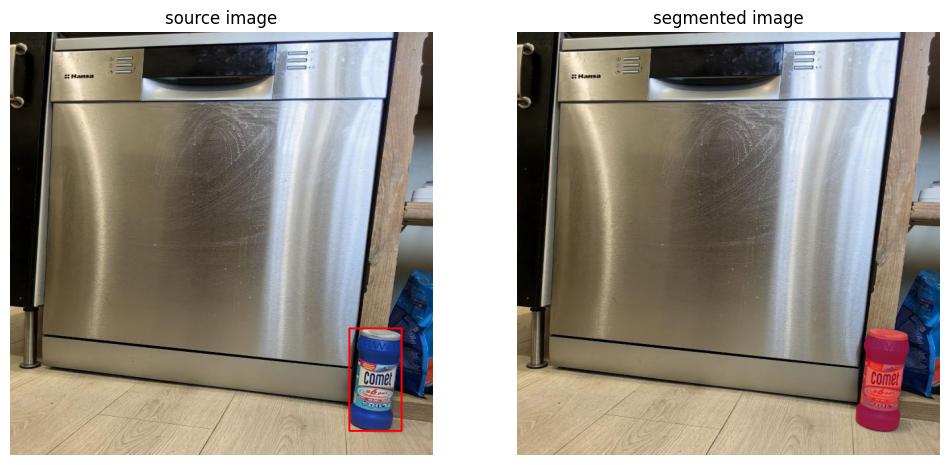

In [ ]:
#к детектированному box применим сегментацию
input_box = np.array(bbox)
image_bgr = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
mask_predictor = SamPredictor(sam)
mask_predictor.set_image(image_rgb)

masks, scores, logits = mask_predictor.predict(
    box=input_box,

    multimask_output=False
)
box_annotator = sv.BoxAnnotator(color=sv.Color.red())
mask_annotator = sv.MaskAnnotator(color=sv.Color.red(), color_lookup=sv.ColorLookup.INDEX)

detections = sv.Detections(
    xyxy=sv.mask_to_xyxy(masks=masks),
    mask=masks
)
detections = detections[detections.area == np.max(detections.area)]

source_image = box_annotator.annotate(scene=image_bgr.copy(), detections=detections, skip_label=True)
segmented_image = mask_annotator.annotate(scene=image_bgr.copy(), detections=detections)

sv.plot_images_grid(
    images=[source_image, segmented_image],
    grid_size=(1, 2),
    titles=['source image', 'segmented image']
)

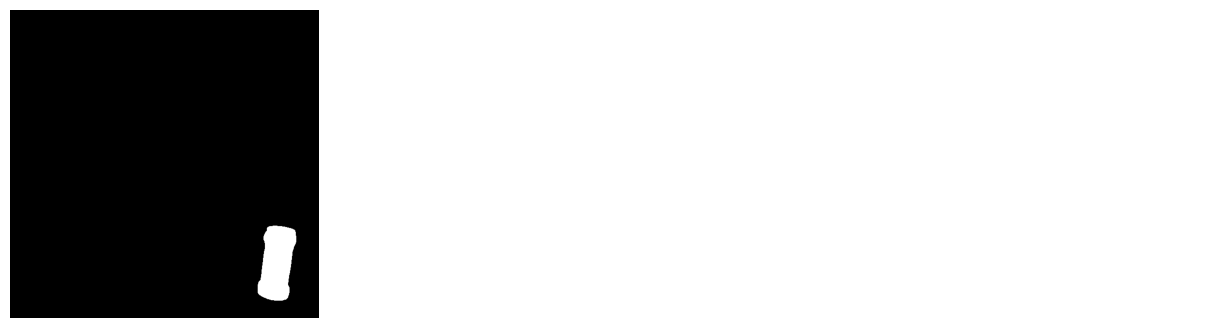

In [ ]:
sv.plot_images_grid(
    images=masks,
    grid_size=(1, 3),
    size=(16, 4)
)

In [ ]:
#найдем высоту банки с порошком

# Рассчитываем ширину и высоту в пикселях
width_pixel = detections.xyxy[0][2] - detections.xyxy[0][0]
height_pixel = detections.xyxy[0][3] - detections.xyxy[0][1]


print("Ширина: ", width_pixel)
print("Высота:", height_pixel)

Ширина:  79
Высота: 155



image 1/1 /content/drive/MyDrive/comet/comet.v1i.yolov8.zip (Unzipped Files)/test/images/photo_13_2024-05-12_13-06-07_jpg.rf.e91cf9d5954848fd1a1e5c26d14dae19.jpg: 480x480 1 dishwasher, 56.3ms
Speed: 9.5ms preprocess, 56.3ms inference, 11.8ms postprocess per image at shape (1, 3, 480, 480)


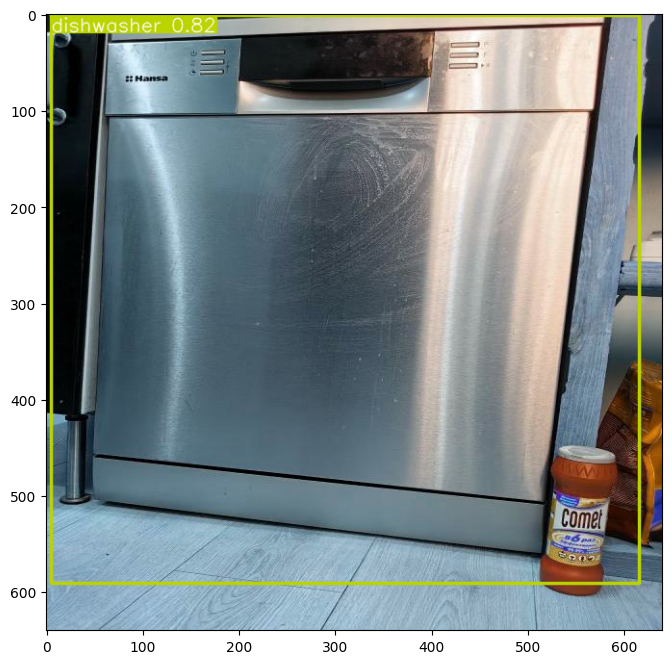

In [ ]:
image_path = '/content/drive/MyDrive/comet/comet.v1i.yolov8.zip (Unzipped Files)/test/images/photo_13_2024-05-12_13-06-07_jpg.rf.e91cf9d5954848fd1a1e5c26d14dae19.jpg'
result_obj  = model_object(image_path)
for result in result_obj:
    boxes = result.boxes

bbox = boxes.xyxy.tolist()[0]
result_obj[0].plot()

plt.figure(figsize=(8,8))
plt.imshow(result[0].plot())

SupervisionWarnings: red is deprecated: `Color.red()` is deprecated and will be removed in `supervision-0.22.0`. Use `Color.RED` instead.
SupervisionWarnings: red is deprecated: `Color.red()` is deprecated and will be removed in `supervision-0.22.0`. Use `Color.RED` instead.
SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead


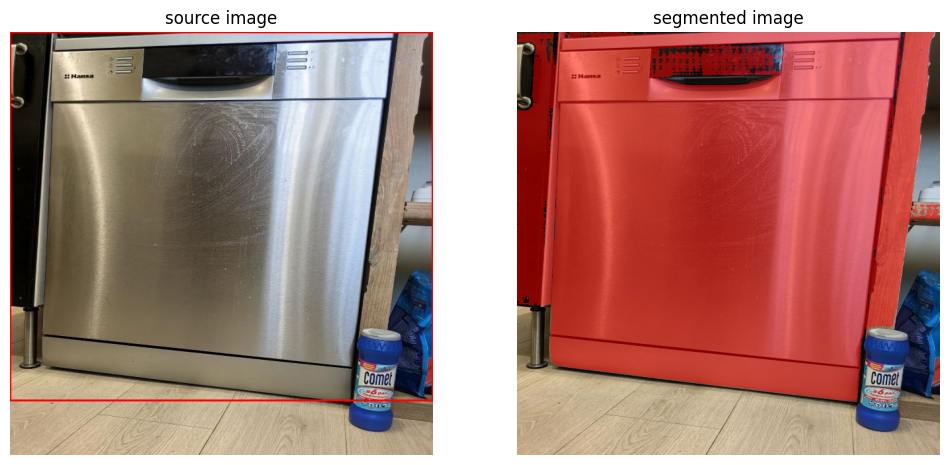

In [ ]:
#к детектированному box применим сегментацию
input_box = np.array(bbox)
image_bgr = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
mask_predictor = SamPredictor(sam)
mask_predictor.set_image(image_rgb)

masks, scores, logits = mask_predictor.predict(
    box=input_box,

    multimask_output=False
)
box_annotator = sv.BoxAnnotator(color=sv.Color.red())
mask_annotator = sv.MaskAnnotator(color=sv.Color.red(), color_lookup=sv.ColorLookup.INDEX)

detections = sv.Detections(
    xyxy=sv.mask_to_xyxy(masks=masks),
    mask=masks
)
detections = detections[detections.area == np.max(detections.area)]

source_image = box_annotator.annotate(scene=image_bgr.copy(), detections=detections, skip_label=True)
segmented_image = mask_annotator.annotate(scene=image_bgr.copy(), detections=detections)

sv.plot_images_grid(
    images=[source_image, segmented_image],
    grid_size=(1, 2),
    titles=['source image', 'segmented image']
)

In [ ]:
#найдем высоту и ширину объекта

# Рассчитываем ширину и высоту в пикселях
width_pixel_obj = detections.xyxy[0][2] - detections.xyxy[0][0]
height_pixel_obj = detections.xyxy[0][3] - detections.xyxy[0][1]


print("Ширина: ", width_pixel_obj)
print("Высота:", height_pixel_obj)

Ширина:  639
Высота: 557


In [ ]:
#рассчитаем реальную высоту и ширину объекта (Ширина х высота банки с порошком весом 475г == 7 х 20 см) (габариты посудомоечной машины: 60 х 84):
width_object = width_pixel_obj * 0.07 / width_pixel
height_object = height_pixel_obj * 0.2 / height_pixel

print(f"Ширина объекта составляет примерно {width_object:.2f} м.")
print(f"Высота объекта составляет примерно {height_object:.2f} м.")

Ширина объекта составляет примерно 0.57 м.
Высота объекта составляет примерно 0.72 м.
